Library

In [57]:
library(limma)
library(GEOquery)
library(oligo)
library(gplots)
library(annotate)
library(topGO)

library(genefilter)

library(pd.ht.hg.u133a)
library(pd.hg.u133.plus.2)
library(hgu133a.db)
library(hgu133plus2.db)

library(ggplot2)
library(wesanderson)


CMAP Data Load and normalize

Platform design info loaded.


Reading in : ./659_HL60/perturb/5500024030760072207028.C07.CEL
Reading in : ./659_HL60/vehicle/5500024030760072207028.A12.CEL
Reading in : ./659_HL60/vehicle/5500024030760072207028.B11.CEL
Reading in : ./659_HL60/vehicle/5500024030760072207028.D10.CEL
Reading in : ./659_HL60/vehicle/5500024030760072207028.E09.CEL
Reading in : ./659_HL60/vehicle/5500024030760072207028.G08.CEL
Reading in : ./659_HL60/vehicle/5500024030760072207028.H07.CEL
Reading in : ./673_MCF7/perturb/5500024030403071907256.C07.CEL
Reading in : ./673_MCF7/vehicle/5500024030403071907256.A12.CEL
Reading in : ./673_MCF7/vehicle/5500024030403071907256.B11.CEL
Reading in : ./673_MCF7/vehicle/5500024030403071907256.D10.CEL
Reading in : ./673_MCF7/vehicle/5500024030403071907256.E09.CEL
Reading in : ./673_MCF7/vehicle/5500024030403071907256.G08.CEL
Reading in : ./673_MCF7/vehicle/5500024030403071907256.H07.CEL
Reading in : ./708_MCF7/perturb/5500024034290101707050.C01.CEL
Reading in : ./708_MCF7/vehicle/5500024034290101707050.

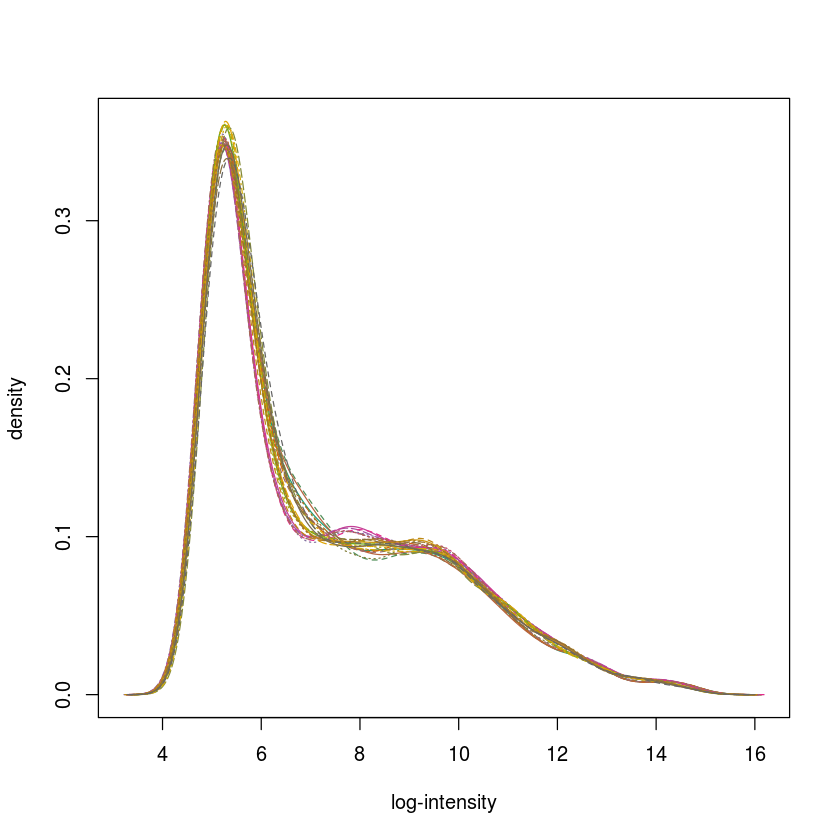

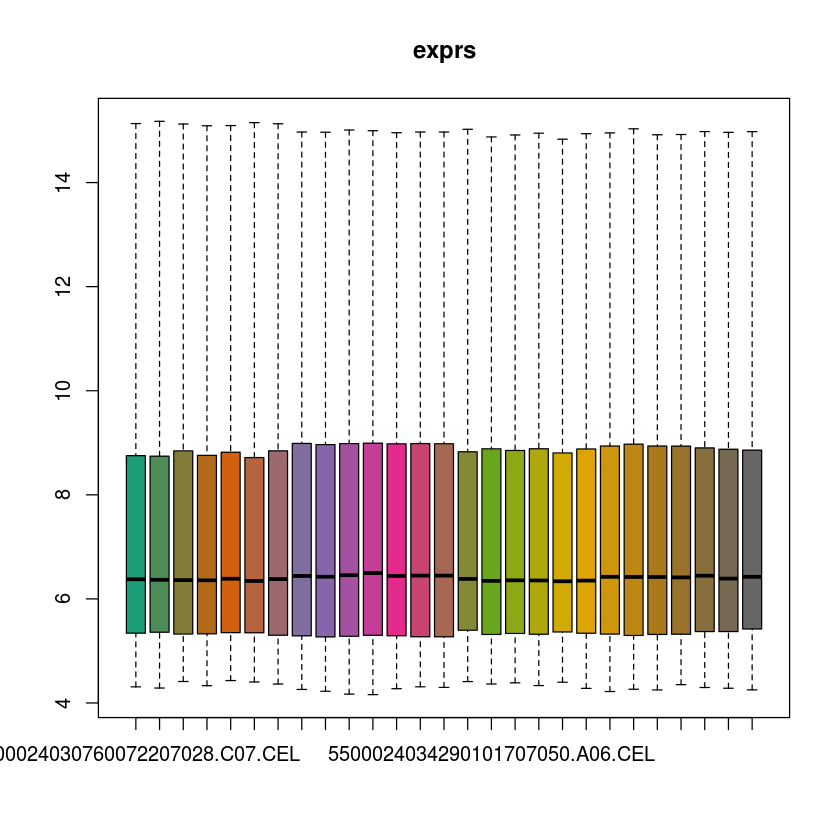

In [10]:
setwd("/home/link9/Dropbox/data.small/crotamiton cel")
cellist_cmap <- list.files(path=".", pattern=".CEL", full.names=TRUE, recursive=TRUE)

cf_cmap<-read.celfiles(filenames = cellist_cmap)

print(cf_cmap)

cf_cmap.norm<-rma(object = cf_cmap)
hist(cf_cmap.norm)
boxplot(cf_cmap.norm)

GEO GSE 57025 Data Load and normalize

H0high <- c(1,5,8,10,11,13,14,16,18,19,23,25,26,28)

NUC PATH : setwd("/media/mnas-smb/bioinformatics.data/Raw data")

Platform design info loaded.


Reading in : ./GSM1373914_001_H0.CEL.gz
Reading in : ./GSM1373917_002_H0.CEL.gz
Reading in : ./GSM1373920_003_H0.CEL.gz
Reading in : ./GSM1373923_004_H0.CEL.gz
Reading in : ./GSM1373926_005_H0.CEL.gz
Reading in : ./GSM1373929_006_H0.CEL.gz
Reading in : ./GSM1373932_007_H0.CEL.gz
Reading in : ./GSM1373935_008_H0.CEL.gz
Reading in : ./GSM1373938_009_H0.CEL.gz
Reading in : ./GSM1373941_010_H0.CEL.gz
Reading in : ./GSM1373944_011_H0.CEL.gz
Reading in : ./GSM1373947_013_H0.CEL.gz
Reading in : ./GSM1373950_014_H0.CEL.gz
Reading in : ./GSM1373953_015_H0.CEL.gz
Reading in : ./GSM1373956_017_H0.CEL.gz
Reading in : ./GSM1373959_018_H0.CEL.gz
Reading in : ./GSM1373962_019_H0.CEL.gz
Reading in : ./GSM1373965_020_H0.CEL.gz
Reading in : ./GSM1373967_021_H0.CEL.gz
Reading in : ./GSM1373970_101_H0.CEL.gz
Reading in : ./GSM1373973_102_H0.CEL.gz
Reading in : ./GSM1373976_104_H0.CEL.gz
Reading in : ./GSM1373979_105_H0.CEL.gz
Reading in : ./GSM1373981_106_H0.CEL.gz
Reading in : ./GSM1373984_107_H0.CEL.gz


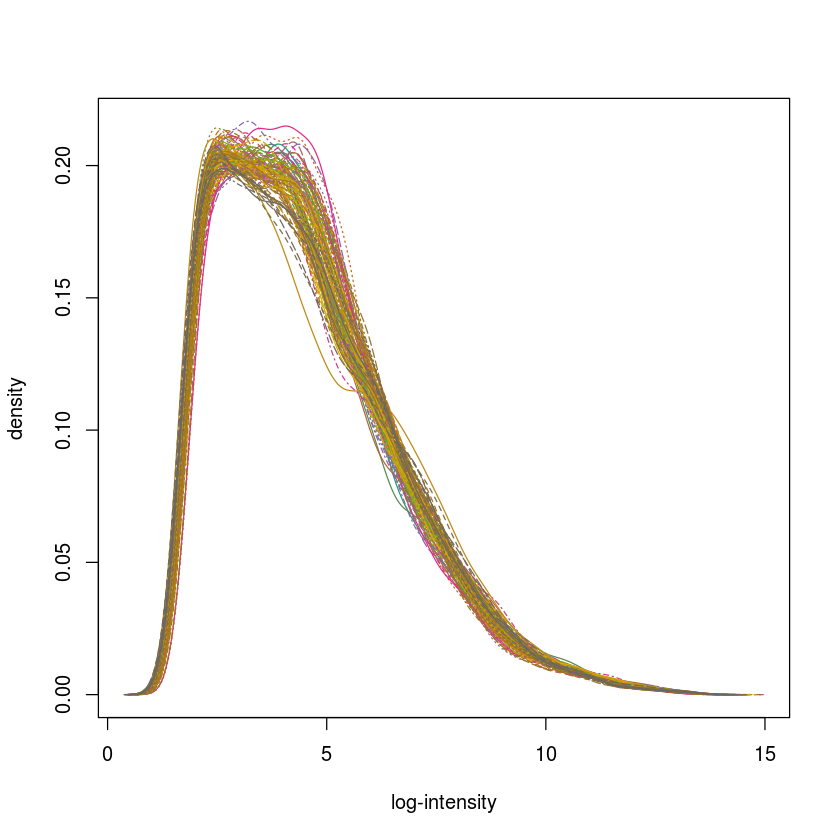

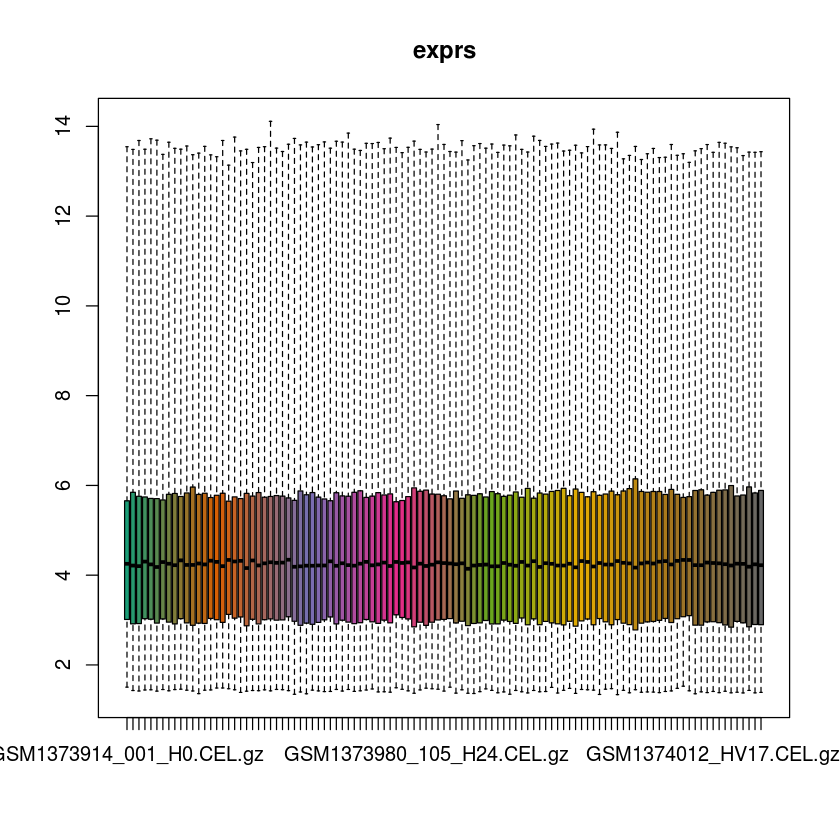

In [47]:
setwd("/media/mnas-smb/bioinformatics.data/GSE57065_RAW/")

cellist_57065 <- list.files(path=".", pattern="H0.CEL", full.names=TRUE, recursive=TRUE)
cellist_57065 <- append(cellist_57065, list.files(path=".", pattern="H24.CEL", full.names=TRUE, recursive=TRUE))
cellist_57065 <- append(cellist_57065, list.files(path=".", pattern="H48.CEL", full.names=TRUE, recursive=TRUE))
cellist_57065 <- append(cellist_57065, list.files(path=".", pattern="_HV", full.names=TRUE, recursive=TRUE))


cf_57065<-read.celfiles(filenames = cellist_57065)

print(cf_57065)

cf_57065.norm<-rma(object = cf_57065)

hist(cf_57065.norm)
boxplot(cf_57065.norm)


CMAP linear model contrasts

In [12]:
batch <- c(rep(659, 7), rep(673, 7), rep(708, 6), rep(712, 7))
perturb <- c(rep("aCrotamiton", 1), rep("bControl", 6), 
               rep("aCrotamiton", 1), rep("bControl", 6),
               rep("aCrotamiton", 1), rep("bControl", 5),
               rep("aCrotamiton", 1), rep("bControl", 6))
cel=factor(paste(batch, perturb, sep=""))

mod<-model.matrix(~0+cel)

fit1<-lmFit(cf_cmap.norm, mod)

contr<-makeContrasts(
  A=cel659aCrotamiton-cel659bControl, 
  B=cel673aCrotamiton-cel673bControl,
  C=cel708aCrotamiton-cel708bControl,
  D=cel712aCrotamiton-cel712bControl,
  levels = mod)
fit2<-contrasts.fit(fit = fit1, contrasts = contr)
fit3<-eBayes(fit2)


CMAP DataFrame Creation

In [19]:
tabA<-topTable(fit3, coef="A", number=Inf, adjust.method = "fdr", sort.by = "p") 
tabB<-topTable(fit3, coef="B", number=Inf, adjust.method = "fdr", sort.by = "p") 
tabC<-topTable(fit3, coef="C", number=Inf, adjust.method = "fdr", sort.by = "p") 
tabD<-topTable(fit3, coef="D", number=Inf, adjust.method = "fdr", sort.by = "p") 

syA<-getSYMBOL(row.names(tabA), data = "hgu133a.db") #annotation 
syB<-getSYMBOL(row.names(tabB), data = "hgu133a.db") #annotation 
syC<-getSYMBOL(row.names(tabC), data = "hgu133a.db") #annotation 
syD<-getSYMBOL(row.names(tabD), data = "hgu133a.db") #annotation 

dfA<-data.frame(Symbol = syA, tabA)
dfB<-data.frame(Symbol = syB, tabB)
dfC<-data.frame(Symbol = syC, tabC)
dfD<-data.frame(Symbol = syD, tabD)

head(dfA)

,Symbol,logFC,AveExpr,t,P.Value,adj.P.Val,B
221101_at,NA,0.627321032384205,5.25994662858576,5.0902208275209,2.74157975521353e-05,0.610741722068918,-2.59104490564289
213186_at,DZIP3,0.732639114122536,7.75111386907555,4.76812409551663,6.38185594967644e-05,0.642745586662826,-2.74431086878234
208941_s_at,SEPHS1,-0.5780701330044,9.38526459715704,-4.6520535714243,8.65572904784522e-05,0.642745586662826,-2.80139632164652
218426_s_at,RNF216,0.815605636775278,7.78793518563068,4.35305629070011,0.000189614770454872,0.813410032851545,-2.95270726221521
204961_s_at,NA,0.772619560963067,5.23230546170942,4.2500932371713,0.000248223902025015,0.813410032851545,-3.00614795219991
206681_x_at,GP2,0.627838699507872,5.63435120515848,4.2402094660532,0.000254718025783376,0.813410032851545,-3.01131171789259


In [ ]:
GSE57065 linear model contrasts
sepsis cell file 82
control cell file 25

In [48]:
sep_57065 <- c(rep("Sepsis", length(cellist_57065)-25))
con_57065 <- c(rep("Control", 25))
d065=factor(c(sep_57065, con_57065))

mod_57065<-model.matrix(~0+d065)

fit1<-lmFit(cf_57065.norm, mod_57065)

contr<-makeContrasts(
  S=d065Sepsis-d065Control, 
  levels = mod_57065)
fit2<-contrasts.fit(fit = fit1, contrasts = contr)
fit3<-eBayes(fit2)

In [ ]:
CMAP DataFrame Creation

In [50]:
tabS<-topTable(fit3, coef="S", number=Inf, adjust.method = "fdr", sort.by = "p") 
dfS<-data.frame(Symbol = getSYMBOL(row.names(tabS), data = "hgu133plus2.db"), tabS)

head(dfS)

,Symbol,logFC,AveExpr,t,P.Value,adj.P.Val,B
235568_at,MCEMP1,4.16705130452244,9.83797430797209,24.3230755368642,6.99484014708849e-46,3.82442885042063e-41,93.6555652220624
203535_at,S100A9,1.48039747513447,13.4667382768773,22.7462955340576,3.184035270324e-43,8.70435642024824e-39,87.6795665998376
232958_at,NA,2.75528401967029,7.98759215224598,21.7808688247392,1.55255657906799e-41,2.8295343653514e-37,83.8750539781351
205863_at,S100A12,3.18230597064401,12.2715400915056,21.0840536240851,2.74824634364248e-40,3.75650922096632e-36,81.0580075543996
220034_at,IRAK3,2.9486692911137,7.29446942138398,20.9593110688301,4.62529668283514e-40,4.69091921114443e-36,80.5473101806799
209369_at,ANXA3,4.11779188305081,9.74918177428746,20.9337208245132,5.14778514254532e-40,4.69091921114443e-36,80.4423015988153


In [ ]:
GARBAGE COLLECTION

In [55]:
gc(verbose = TRUE)

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,5626753.0,300.6,8273852.0,441.9,8273852.0,441.9
Vcells,176831054.0,1349.2,378776848.0,2889.9,374842561.0,2859.9


CMAP DEG Extraction
standard : 1. Up or Down 2. FC 3. P-value

TO PRINT LIST
cat(degdU, sep="\n")

In [88]:
## extract gene using FC
v_fc <- c(1.5, 2, 2.5, 3, 3.5)

nodeg <- c()
for (fold in v_fc) {


deguA<-row.names(dfA[which(log2(fold) < dfA$logFC),])
deguB<-row.names(dfB[which(log2(fold) < dfB$logFC),])
deguC<-row.names(dfC[which(log2(fold) < dfC$logFC),])
deguD<-row.names(dfD[which(log2(fold) < dfD$logFC),])
    
degdA<-row.names(dfA[which(dfA$logFC < -log2(fold)),])
degdB<-row.names(dfB[which(dfB$logFC < -log2(fold)),])
degdC<-row.names(dfC[which(dfC$logFC < -log2(fold)),])
degdD<-row.names(dfD[which(dfD$logFC < -log2(fold)),])
    
degudA<-row.names(dfA[which( log2(fold) < abs(dfA$logFC) ),]) 
degudB<-row.names(dfB[which( log2(fold) < abs(dfB$logFC) ),]) 
degudC<-row.names(dfC[which( log2(fold) < abs(dfC$logFC) ),]) 
degudD<-row.names(dfD[which( log2(fold) < abs(dfD$logFC) ),]) 

    
deguU<-Reduce(union, list(deguA,deguB,deguC,deguD))
deguI<-Reduce(intersect, list(deguA,deguB,deguC,deguD))

degdU<-Reduce(union, list(degdA,degdB,degdC,degdD))
degdI<-Reduce(intersect, list(degdA,degdB,degdC,degdD))
    
degudU<-Reduce(union, list(degudA,degudB,degudC,degudD))
degudI<-Reduce(intersect, list(degudA,degudB,degudC,degudD))

nodeg <- cbind(nodeg,c(length(deguU),length(degdU),length(degudU), length(deguI), length(degdI), length(degudI))) 
    
    
}

df_nodeg <- data.frame(nodeg)
colnames(df_nodeg) <- v_fc
row.names(df_nodeg) <- c("UP, Union", "DOWN, Union", "ALL, Union", "UP, Intersect", "DOWN, Intersect", "UP+DOWN, Intersect")
df_nodeg

,1.5,2,2.5,3,3.5
"UP, Union",374,17,1,1,0
"DOWN, Union",529,66,12,2,0
"ALL, Union",897,82,13,3,0
"UP, Intersect",0,0,0,0,0
"DOWN, Intersect",0,0,0,0,0
"UP+DOWN, Intersect",0,0,0,0,0


In [ ]:
GSE57065 DEG EXTRACTION


In [ ]:
fold <- 2.5

deguS <- row.names(dfS[which((dfS$adj.P.Val < 0.05) & (log2(fold) < dfS$logFC)),])
degdS <- row.names(dfS[which((dfS$adj.P.Val < 0.05) & (dfS$logFC < -log2(fold))),])

length(deguS)
length(degdS)

In [ ]:
# batcah ex heatmap

exA<-exprs(cf_cmap.norm)[degA,1:7]
syA.deg<-getSYMBOL(row.names(exA), data = "hgu133a.db")
heatmap.2(exA, trace = "none", scale="row", margins = c(10, 7), col = colorRampPalette(c("red", "black", "green")), labRow = syA.deg)

exB<-exprs(cf_cmap.norm)[degB,8:14]
syB.deg<-getSYMBOL(row.names(exB), data = "hgu133a.db")
heatmap.2(exB, trace = "none", scale="row", margins = c(10, 7), col = colorRampPalette(c("red", "black", "green")), labRow = syB.deg)

exC<-exprs(cf_cmap.norm)[degC,15:20]
syC.deg<-getSYMBOL(row.names(exC), data = "hgu133a.db")
heatmap.2(exC, trace = "none", scale="row", margins = c(10, 7), col = colorRampPalette(c("red", "black", "green")), labRow = syC.deg)

exD<-exprs(cf_cmap.norm)[degD,21:27]
syD.deg<-getSYMBOL(row.names(exD), data = "hgu133a.db")
heatmap.2(exD, trace = "none", scale="row", margins = c(10, 7), col = colorRampPalette(c("red", "black", "green")), labRow = syD.deg)

#FC heatmap

fcA<-dfA[degA,1:2] 
syA.deg<-getSYMBOL(row.names(fcA), data = "hgu133plus2.db")
heatmap.2(fcA, trace = "none", scale="row", margins = c(10, 7), col = colorRampPalette(c("red", "black", "green")), labRow = syA.deg)

fcB<-dfB[degB,1:2] 
syB.deg<-getSYMBOL(row.names(fcB), data = "hgu133plus2.db")
heatmap.2(exB, trace = "none", scale="row", margins = c(10, 7), col = colorRampPalette(c("red", "black", "green")), labRow = syB.deg)






#intersect heatmap

#degI<-Reduce(intersect, list(degA,degB,degC,degD))
degI
exI<-exprs(cf_cmap.norm)[degI,c(1,8,15,21)]
syI<-getSYMBOL(degI, data = "hgu133a.db")
heatmap.2(exI, trace = "none", scale="row", margins = c(10, 7), col = colorRampPalette(c("red", "black", "green")), labRow = syI)

# union heatmap

#degU<-Reduce(union, list(degA,degB,degC,degD))
degU
exU<-exprs(cf_cmap.norm)[degU,c(1,8,15,21)]
syU<-getSYMBOL(degU, data = "hgu133a.db")
heatmap.2(exU, trace = "none", scale="row", margins = c(10, 7), col = colorRampPalette(c("red", "black", "green")), labRow = syU)
